## Expressibility and entangling capability of parameterized quantum circuits for hybrid quantum-classical algorithms

Ref) *Adv.Quantum.Technol.* **2** 1900070 (2019): https://arxiv.org/abs/1905.10876  
S.Sim,P.D.Johnson and A.Aspuru-Guzik 

Consider a parameterized quantum circuit $U(\mathbf{x})$, and define the quantity
$$f(\mathbf{x},\mathbf{y}) = |\langle 0 | U^{\dagger}(\mathbf{y})U(\mathbf{x})|0\rangle|^{2}$$
This quantity is the fidelity of the two states
$$\begin{align*}
|\psi_{\mathbf{x}}\rangle = U(\mathbf{x})|0\rangle~~&\text{and}~~|\psi_{\mathbf{y}}\rangle = U(\mathbf{y})|0\rangle:\\
|\langle \psi_{\mathbf{y}}|\psi_{\mathbf{x}}\rangle|^{2} &= |\langle 0 |U^{\dagger}(\mathbf{y})U(\mathbf{x})|0\rangle|^{2}.
\end{align*}$$

- Suppose we generate a bunch of random realizations of $\mathbf{x},\mathbf{y}$. This gives us a set of random realizations of $f$
$$F = \{f_{1}, f_{2}, \cdots \}.$$

- if the circuit generating that fidelity is drawn from a Haar-random distribution. If the circuit acts on $n$ qubits, the probability of a given fidelity value $f$ is:
$$ \mathrm{Pr}_{\text{Haar}}(f) = (N -1)*(1-f)^{N-2}~~N=2^{n}.$$

- To calculate the probability over a bin of the histogram, we do an integral:
$$\mathrm{Pr}_{\text{Haar}}(j) = \int_{l_{j}}^{u_{j}}  \mathrm{Pr}_{\text{Haar}}(f) ~df =  (1-l_{j})^{N-1}  - (1-u_{j})^{N-1}$$

- The expressibility is then estimated as the KL divergence between the empirically-observed probability distribution (i.e., the histogram) and the probability distribution that would result under a Haar-random unitary.
$$\text{Expr} = \mathrm{KL}(\mathrm{Pr}_{\text{emp}}|| \mathrm{Pr}_{\text{Haar}}) = \sum_{j} \mathrm{Pr}_{\text{emp}}(j)\log\left(\frac{\mathrm{Pr}_{\text{emp}}(j)}{\mathrm{Pr}_{\text{Haar}}(j)}\right)$$

In [1]:
from matplotlib import pyplot
from qiskit import *
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit.extensions import *

from qiskit.quantum_info import random_unitary

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math
from math import pi, sqrt

from scipy.special import rel_entr
from random import seed
from random import random
import cmath

## $Pr_{haar}$

In [2]:
#Possible Bin
bins_list=[];
for i in range(76):
    bins_list.append((i)/75)

#Center of the Bean
bins_x=[]    
for i in range(75):
    bins_x.append(bins_list[1]+bins_list[i])
    
def P_harr(l,u,N):
    return (1-l)**(N-1)-(1-u)**(N-1)

def P_harr_hist(bins, qubit_num=1):
    P_harr_hist = []
    for i in range(75):
        P_harr_hist.append(P_harr(bins[i],bins[i+1],2**qubit_num))
        
    return P_harr_hist
    

## Fidelities

In [3]:
def get_fidelity(circuit):
    backend = Aer.get_backend('qasm_simulator')
    qubit_num = 1
    nshot = 3000
    nparam = 3000
    fidelity = []

    for x in range(nparam):
    
        theta = [];
        for y in range(80):
            theta.append(2*pi*random())
        
        qc = circuit(theta)    
    
        job = backend.run(qc,shots=nshot)
        result = job.result()
        count = result.get_counts()

        if '0' in count:
            ratio=count['0']/nshot
        else:
            ratio=0
        fidelity.append(ratio)
        
    return fidelity


## circuit1

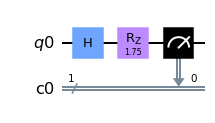

In [4]:
def circuit1(theta):
    qr = QuantumRegister(1)
    cr = ClassicalRegister(1)
    qc = QuantumCircuit(qr, cr)
    
    qc.h(0)
    qc.rz(theta[0],0)
        
    qc.measure(qr[:],cr[:])
    return qc

theta=[];
for _ in range(80):
    theta.append(2*pi*random())
circuit1(theta).draw('mpl')

In [5]:
fidelity = get_fidelity(circuit1)

In [6]:
weights = np.ones_like(fidelity)/float(len(fidelity))
P_1_hist = np.histogram(fidelity, bins=bins_list, weights=weights, range=[0, 1])[0]
harr_hist = P_harr_hist(bins=bins_list)
kl_pq = rel_entr(P_1_hist, harr_hist)
print('KL(P || Q): %.3f nats' % sum(kl_pq))

KL(P || Q): 3.217 nats


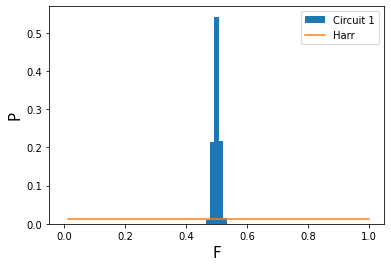

In [7]:
plt.hist(fidelity, bins=bins_list, weights=weights, range=[0, 1], label='Circuit 1')
plt.plot(bins_x, harr_hist, label='Harr')
plt.xlabel('F',fontsize=15)
plt.ylabel('P',fontsize=15)
plt.legend(loc='upper right')
plt.show()

## circuit 2

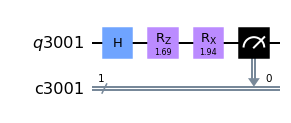

In [8]:
def circuit2(theta):
    qr = QuantumRegister(1)
    cr = ClassicalRegister(1)
    qc = QuantumCircuit(qr, cr)
    
    qc.h(0)
    qc.rz(theta[0],0)
    qc.rx(theta[1],0)
        
    qc.measure(qr[:],cr[:])
    return qc

theta=[];
for _ in range(80):
    theta.append(2*pi*random())
circuit2(theta).draw('mpl')

In [9]:
fidelity = get_fidelity(circuit2)

In [10]:
weights = np.ones_like(fidelity)/float(len(fidelity))
P_1_hist = np.histogram(fidelity, bins=bins_list, weights=weights, range=[0, 1])[0]
harr_hist = P_harr_hist(bins=bins_list)
kl_pq = rel_entr(P_1_hist, harr_hist)
print('KL(P || Q): %.3f nats' % sum(kl_pq))

KL(P || Q): 0.059 nats


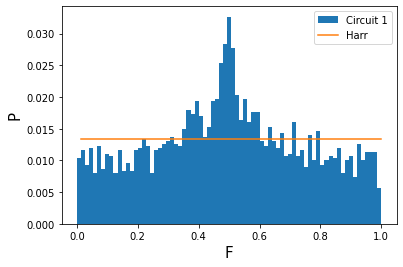

In [11]:
plt.hist(fidelity, bins=bins_list, weights=weights, range=[0, 1], label='Circuit 1')
plt.plot(bins_x, harr_hist, label='Harr')
plt.xlabel('F',fontsize=15)
plt.ylabel('P',fontsize=15)
plt.legend(loc='upper right')
plt.show()

In [12]:
import qiskit.tools.jupyter
%qiskit_version_table